In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [3]:
df = pd.read_csv('law.csv')
df.drop(df.columns.values[0], inplace=True, axis=1)
df.head()

,observation,LSAT,GPA
0,1,576,3.39
1,2,635,3.30
2,3,558,2.81
3,4,578,3.03
4,5,666,3.44


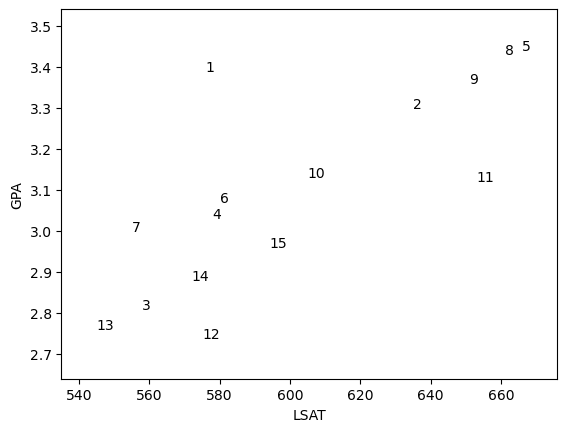

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(df['LSAT'].min()-10, df['LSAT'].max()+10)
ax.set_ylim(df['GPA'].min()-.1, df['GPA'].max()+.1)
ax.set_xlabel('LSAT')
ax.set_ylabel('GPA')
for i in range(len(df)):
    ax.annotate(df['observation'][i], (df['LSAT'][i], df['GPA'][i]))


In [6]:
def corr_fn(data, index):
    return pearsonr(data.loc[index, "LSAT"], data.loc[index, "GPA"])[0]

# Perform the complete enumeration bootstrap
n = len(df)
print(f"Number of observations: {n}")
boot_samples = [np.random.choice(df.index, n, replace=False) for _ in range(100)]
boot_stats = [corr_fn(df, sample) for sample in boot_samples]

# Compute the bootstrap statistics
boot_mean = np.mean(boot_stats)
boot_std = np.std(boot_stats)
boot_bias = boot_mean - pearsonr(df["LSAT"], df["GPA"])[0]
boot_ci = np.percentile(boot_stats, [2.5, 97.5])

# Print the bootstrap statistics
print("Bootstrap Statistics:")
print(f"    original   bias    std. error")
print(f"t1* {pearsonr(df['LSAT'], df['GPA'])[0]:.6f} {boot_bias:.6f}  {boot_std:.6f}")
print(f"CI  ({boot_ci[0]:.6f}, {boot_ci[1]:.6f})")

Number of observations: 15
Bootstrap Statistics:
    original   bias    std. error
t1* 0.776374 -0.000000  0.000000
CI  (0.776374, 0.776374)
